# SI618 HW7 Kaggle <br>
## UMID: 50253165

In [81]:
pip install catboost


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [82]:
pip install xgboost


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [84]:
test = pd.read_csv("/Users/sandeepjala/Documents/SI618/SI_618_WN_24_Files/homework/spaceship-titanic/test.csv")
train = pd.read_csv("/Users/sandeepjala/Documents/SI618/SI_618_WN_24_Files/homework/spaceship-titanic/train.csv")
sample = pd.read_csv("/Users/sandeepjala/Documents/SI618/SI_618_WN_24_Files/homework/spaceship-titanic/sample_submission.csv")

In [85]:
train.sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
2724,2925_01,Mars,False,F/609/P,TRAPPIST-1e,43.0,False,336.0,11.0,796.0,15.0,0.0,Cines Minen,True
5727,6067_01,Earth,False,G/984/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,44.0,1721.0,Dellie Perkinson,False
3007,3258_01,Earth,True,G/529/P,TRAPPIST-1e,9.0,False,0.0,0.0,0.0,0.0,0.0,Genee Waltonnedy,False
5794,6137_03,Earth,True,G/994/S,TRAPPIST-1e,32.0,False,0.0,0.0,0.0,0.0,0.0,Hary Serry,True
1110,1177_01,Europa,True,C/44/P,TRAPPIST-1e,59.0,False,0.0,0.0,0.0,0.0,0.0,Kaffias Wasterivel,True


In [86]:
test.sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
2537,5554_01,Earth,True,G/889/P,TRAPPIST-1e,21.0,False,0.0,0.0,NaN,0.0,0.0,Jarena Mayder
1772,3764_02,Earth,True,G/614/P,TRAPPIST-1e,5.0,False,0.0,0.0,0.0,0.0,0.0,Lan Moodmandez
2867,6307_01,Earth,False,F/1306/P,55 Cancri e,32.0,False,7.0,0.0,9.0,NaN,0.0,Emilla Huffy
4267,9260_01,Earth,True,G/1503/P,55 Cancri e,3.0,NaN,0.0,0.0,0.0,0.0,0.0,Luisy Portananney
2595,5672_01,Earth,True,G/908/P,TRAPPIST-1e,13.0,False,0.0,0.0,0.0,0.0,0.0,Maryn Potthews


In [87]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

/var/folders/5s/fpydwv6n7kzb46w2tptt4bjr0000gn/T/ipykernel_973/1202957020.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train.isnull().sum().index, y=train.isnull().sum().values, palette="viridis")


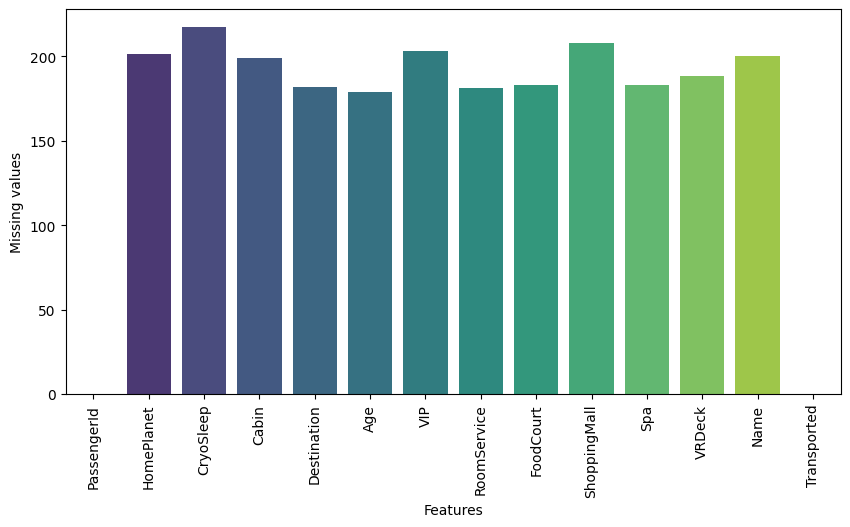

In [88]:
plt.figure(figsize=(10, 5))
sns.barplot(x=train.isnull().sum().index, y=train.isnull().sum().values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Missing values")
plt.show()

In [89]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

/var/folders/5s/fpydwv6n7kzb46w2tptt4bjr0000gn/T/ipykernel_973/4199479709.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=test.isnull().sum().index, y=test.isnull().sum().values, palette="viridis")


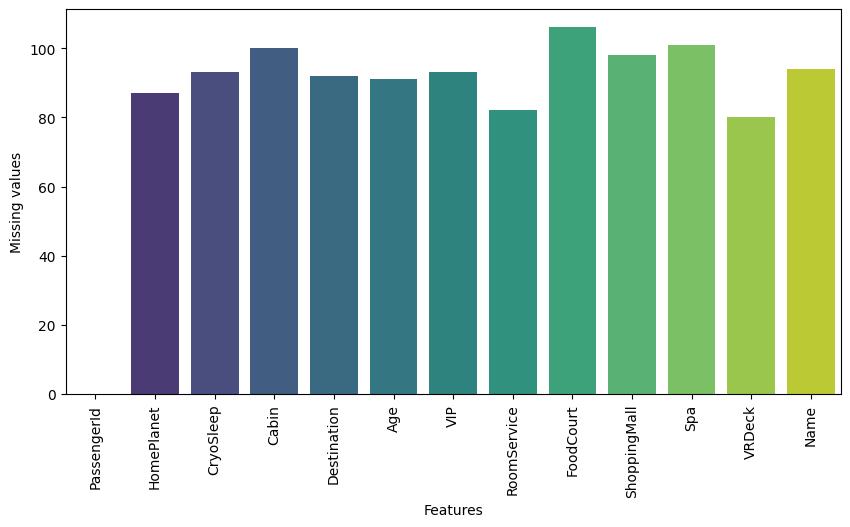

In [90]:
plt.figure(figsize=(10, 5))
sns.barplot(x=test.isnull().sum().index, y=test.isnull().sum().values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Missing values")
plt.show()

We observe that almost all the features have similar number of missing values. The test data has missing values and hence we need a method to impute the data.

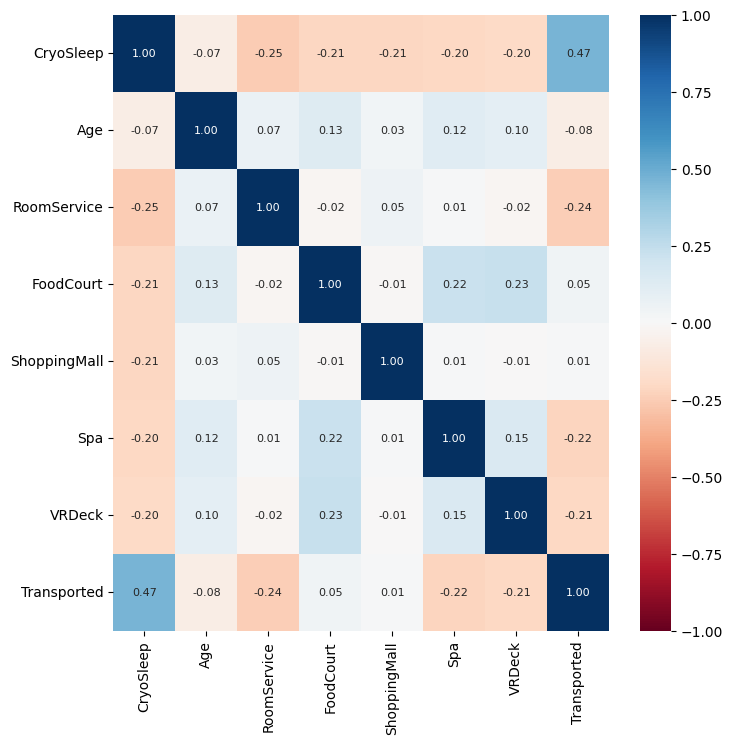

In [91]:
plt.figure(figsize=(8, 8))
sns.heatmap(train[['CryoSleep','Age', 'RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']].corr(), 
            cmap="RdBu",vmax=1,vmin=-1,annot=True, fmt=".2f", annot_kws={"size": 8})
plt.show()

We can observe a significant correlation between Transported and CryoSleep, indicating that passanger in Cryosleep are more likely to be transported. CryoSleep shows a weak negative correlation with other expenditure-related features like RoomService, FoodCourt, ShoppingMall, Spa, and VRDeck. This could imply that those who opt for cryosleep tend to spend less on these services.<br>
Age seems to have very little to no linear correlation with other features, indicating that age may not be a strong predictor for these variables.

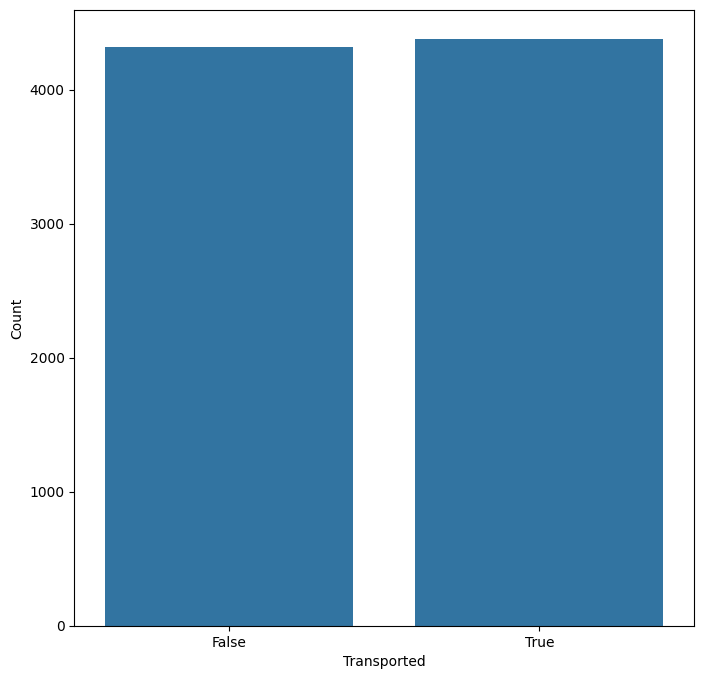

In [92]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Transported', data=train,)
plt.xlabel("Transported")
plt.ylabel("Count")
plt.show()

The dataset has approximately an equal number of passengers who are transported and who are not transported. Hence we do not have a class Imbalance.

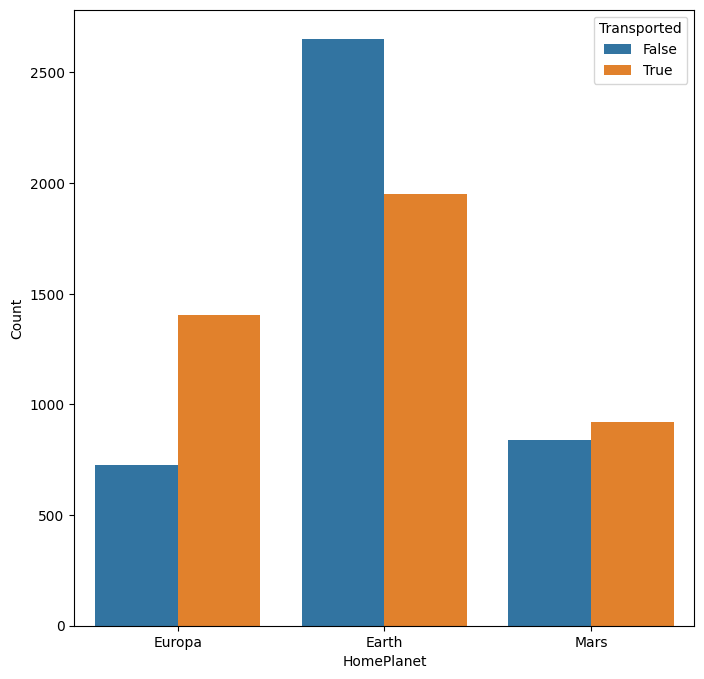

In [93]:
plt.figure(figsize=(8, 8))
sns.countplot(x='HomePlanet', data=train, hue='Transported')
plt.xlabel("HomePlanet")
plt.ylabel("Count")
plt.show()

The planet Earth has the most number of individuals transported, but Europa has a higher count of individuals who were transported compared to those who were not transported.<br> Mars shows a relatively balanced count between transported and not transported individuals

In [94]:
train[["Deck", "CabinNum", "Side"]] = train["Cabin"].str.split("/", expand=True)
train.drop('Cabin', axis=1, inplace=True)

In [95]:
test[["Deck", "CabinNum", "Side"]] = test["Cabin"].str.split("/", expand=True)
test.drop('Cabin', axis=1, inplace=True)

We divided the cabin column into 3 different columns, which will be helpful as the number of categories in the cabin is very high. After splitting it, the splitted columns provide the same details.

In [96]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [97]:
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
Deck               8
CabinNum        1817
Side               2
dtype: int64

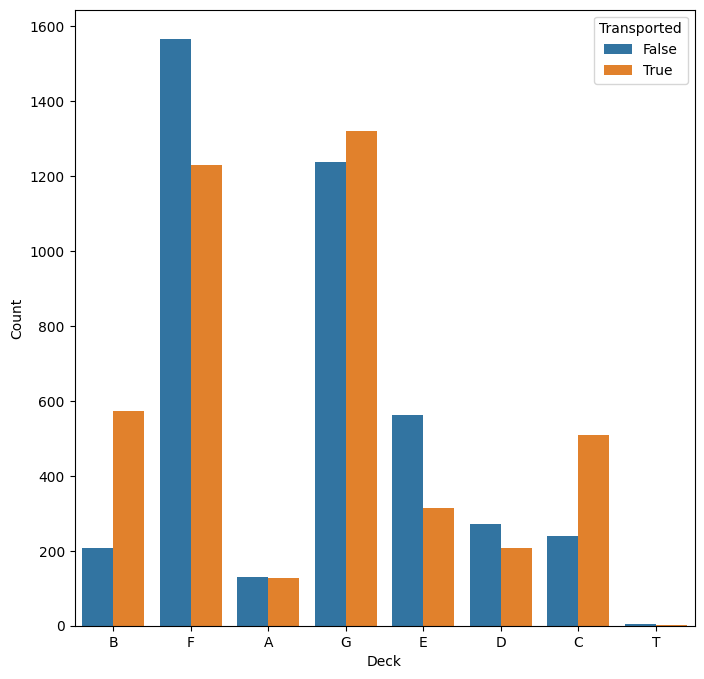

In [98]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Deck', data=train, hue='Transported')
plt.xlabel("Deck")
plt.ylabel("Count")
plt.show()

Deck G has the highest count of transported individuals among all decks and Deck F has highest count of individual who are not transported.<br>
Deck B and Deck C has the more number of people transported than not transported.

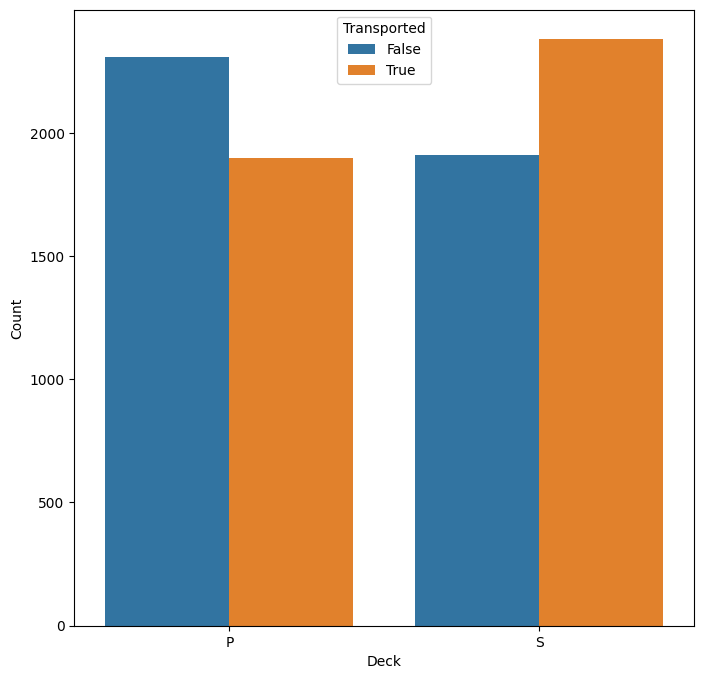

In [99]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Side', data=train, hue='Transported')
plt.xlabel("Deck")
plt.ylabel("Count")
plt.show()

The individual on deck S is more likely to be transported than on deck P.

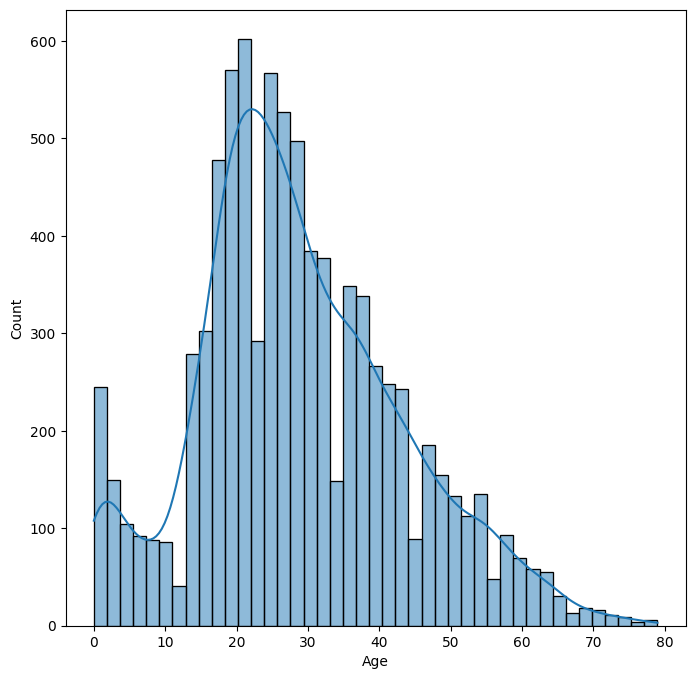

In [100]:
plt.figure(figsize=(8, 8))
sns.histplot(train["Age"], kde=True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


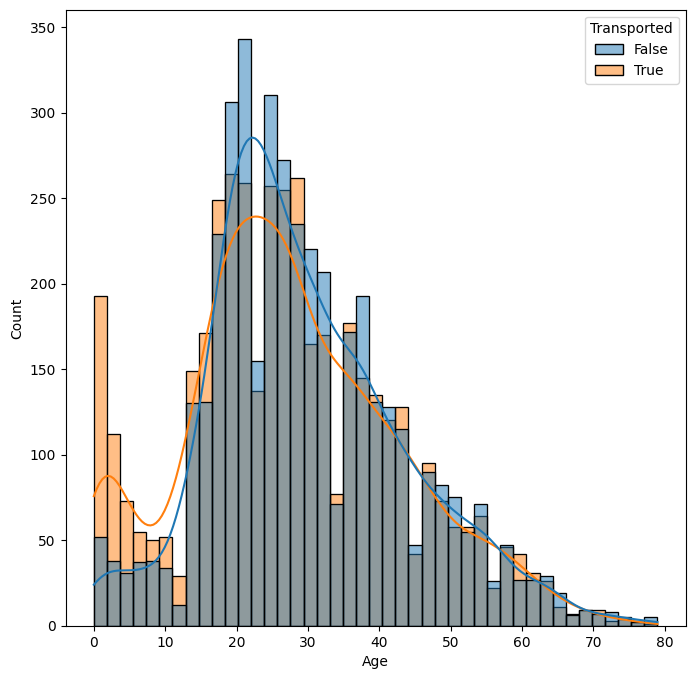

In [101]:
plt.figure(figsize=(8, 8))
sns.histplot(data=train, hue='Transported', x='Age', kde=True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

The histogram is right-skewed, and it is not normally distributed; the distribution starts to taper after age 40 to age 80. Most individuals are in the age range of 18 to 30. <br> Both the distribution (transported and not transported) is very similar, where the number of people of young age below 16 has a higher number of transported than not transported. This makes sense as the young individuals are given more priority; they have their whole lives to live.

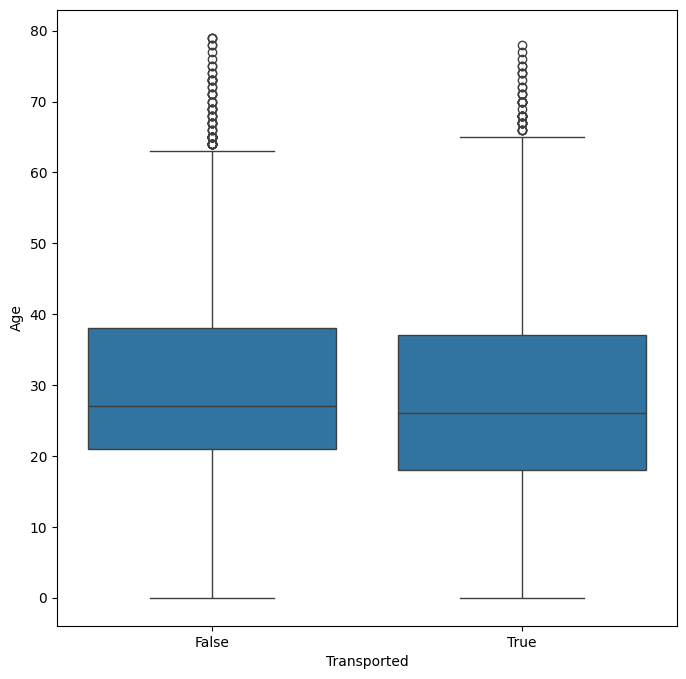

In [102]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='Transported', y='Age', data=train)
plt.xlabel("Transported")
plt.ylabel("Age")
plt.show()

Both Transported and not transported have a similar median age, which appears to be around the early 30s.<br> There are a significant number of outliers in both categories, these outliers represent individuals who are older than the typical range, they are mostly above the age ~63 years.

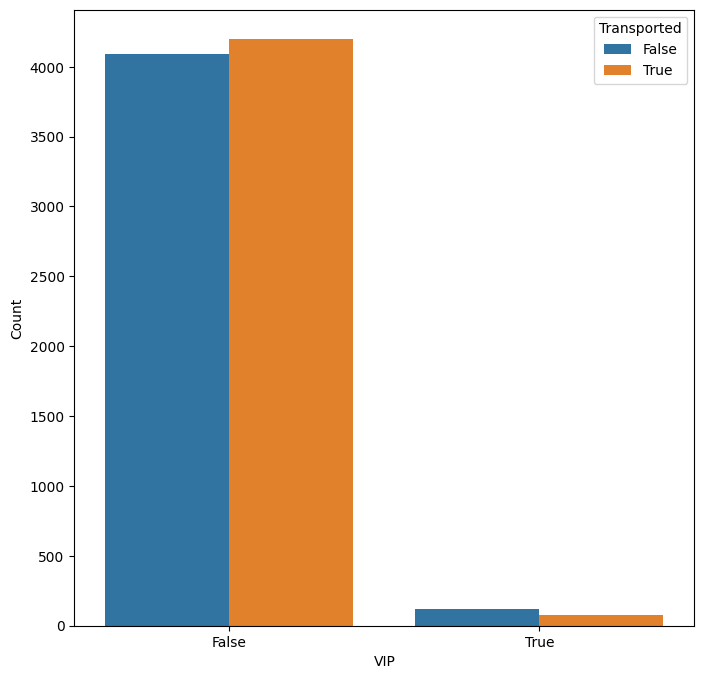

In [103]:
# plot using VIP
plt.figure(figsize=(8, 8))
sns.countplot(x='VIP', data=train, hue='Transported')
plt.xlabel("VIP")
plt.ylabel("Count")
plt.show()



The number of VIP are very less and the number of VIP who are not transported are more than the VIP who are transported. Overall this also shows that there might be no or very little effect of being a VIP and being transported.

# Model Training.

In [104]:
X=train.drop('Transported', axis=1)
y=train['Transported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [105]:
imputer = KNNImputer(n_neighbors=3, weights='distance')

In [106]:
numerical_columns = ['ShoppingMall','FoodCourt','RoomService','Spa','VRDeck','Age']
categorical_columns = ['CryoSleep','Deck','Side','VIP','HomePlanet','Destination']

In [107]:
numeric_transformer = Pipeline(steps=[
    ('num_imputer', imputer),
    ('scaler', StandardScaler())
])

In [108]:
categorical_transformer = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse_output=False, drop='first'))  
])

In [109]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)  
    ]
)

The code below is to get the parameters for each model, I have not run these code cells again as they take too much time to run again. I used GPT to create the parameter grid for each of the model.

In [ ]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('svm', SVC())
])
param_grid = {
    'svm__C': np.logspace(-2, 10, 13),  # Exploring a wider range for C
    'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'svm__gamma': np.logspace(-9, 3, 13),  # A wider range for gamma
    'svm__degree': list(range(1, 6)),  # Extending degrees for the polynomial kernel
    'svm__coef0': np.linspace(0, 10, 11) 
}
grid_search = RandomizedSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Ensemble Training Accuracy: {accuracy:.4f}')

In [ ]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('hist', HistGradientBoostingClassifier())
])
param_grid = {
    'hist__loss': ['binary_crossentropy', 'categorical_crossentropy'],
    'hist__learning_rate': np.logspace(-3, 0, 10),
    'hist__max_iter': [100, 200, 300, 400, 500, 600],
    'hist__max_depth': [None, 3, 5, 7, 10, 12, 15],
    'hist__min_samples_leaf': [10, 20, 30, 40, 50, 60],
    'hist__l2_regularization': np.linspace(0, 1, 10),
    'hist__max_bins': [150, 200, 225, 255]
}
grid_search = RandomizedSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Ensemble Training Accuracy: {accuracy:.4f}')


In [ ]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('cbc', CatBoostClassifier())
])
param_grid = {
    'cbc__iterations': [100, 200, 300, 400, 500, 600],
    'cbc__learning_rate': np.logspace(-3, 0, 10),
    'cbc__depth': [4, 6, 8, 10, 12],
    'cbc__l2_leaf_reg': [1, 3, 5, 7, 9, 11],
    'cbc__border_count': [32, 64, 128, 256, 512],
    'cbc__bagging_temperature': np.linspace(0.7, 1.5, 9),
    'cbc__random_strength': np.linspace(1, 10, 10)
}
grid_search = RandomizedSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Ensemble Training Accuracy: {accuracy:.4f}')

In [ ]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier())
])
param_grid = {
    'rf__n_estimators': [50, 100, 200, 500, 1000, 1500],
    'rf__max_features': ['auto', 'sqrt', 'log2', None, 0.5, 0.3, 0.1],
    'rf__max_depth': [None, 10, 20, 30, 40, 50, 60, 70],
    'rf__min_samples_split': [2, 5, 10, 15, 20, 25],
    'rf__min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'rf__bootstrap': [True, False]  # Threshold for early stopping in tree growth
}
grid_search = RandomizedSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Ensemble Training Accuracy: {accuracy:.4f}')

In [ ]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier())
])
param_grid = {
    'knn__n_neighbors': range(1, 31),   
    'knn__weights': ['uniform', 'distance'], 
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
    'knn__p': [1, 2,3,4,5], 
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'],  
    'knn__leaf_size': range(1, 50)
}
grid_search = RandomizedSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Ensemble Training Accuracy: {accuracy:.4f}')

In [ ]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb_clf', xgb.XGBClassifier())
])
param_grid = {
    'xgb_clf__n_estimators': [100, 200, 300, 400, 500, 600],
    'xgb_clf__learning_rate': np.logspace(-3, 0, 10),
    'xgb_clf__max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'xgb_clf__subsample': np.linspace(0.5, 1.0, 6),
    'xgb_clf__colsample_bytree': np.linspace(0.5, 1.0, 6),
    'xgb_clf__gamma': np.linspace(0, 0.5, 6),
    'xgb_clf__min_child_weight': [1, 2, 4, 6, 8, 10]
}
grid_search = RandomizedSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Ensemble Training Accuracy: {accuracy:.4f}')

I have used the best parameters from the above models to create a voting classifier, for the XGboost classifier i have used the parameters in one of the kaggle code. Reference is given in the end of the file.

In [110]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('voting', VotingClassifier(
        estimators=[('xgb_clf', xgb.XGBClassifier(reg_lambda=3, reg_alpha=4.5,
                    subsample=0.95, learning_rate=0.06, n_estimators=730, max_depth=5, min_child_weight=1, num_parallel_tree=1)),
        ('rf', RandomForestClassifier(n_estimators=100, max_depth = None, bootstrap = True, criterion='entropy', min_samples_leaf= 5)),
        ('cbc', CatBoostClassifier(random_strength=0.8, learning_rate=0.03, l2_leaf_reg= 7, iterations= 500, depth= 6, border_count= 64, bagging_temperature=0.25,verbose=0)),
        ('hist', HistGradientBoostingClassifier(min_samples_leaf=40,max_leaf_nodes=31, max_iter=200, max_depth=3, max_bins=100, learning_rate=0.01)),
        ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=25, metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=18, p=2, weights='uniform'))
    ]
,n_jobs=-1))
])


In [111]:
param_grid = {
    'voting__voting': ['soft', 'hard'],
    'voting__weights': [[1, 1, 1, 1, 1], [1, 2, 1, 1, 1], [1, 1, 2, 1, 1], [1, 1, 1, 2, 1], [1, 1, 1, 1, 2]]  # Example weights for 3 classifiers
}

In [112]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)

In [113]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          KNNImputer(n_neighbors=3,
                                                                                                     weights='distance')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['ShoppingMall',
                                                                          'FoodCourt',
                                                                          'RoomService',
                                                                          'Spa',
                                                                          'VRDeck',
                                                                          'Age']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('cat_imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),...
                                                                     ('hist',
                                                                      HistGradientBoostingClassifier(learning_rate=0.01,
                                                                                                     max_bins=100,
                                                                                                     max_depth=3,
                                                                                                     max_iter=200,
                                                                                                     min_samples_leaf=40)),
                                                                     ('knn',
                                                                      KNeighborsClassifier(leaf_size=25,
                                                                                           n_jobs=1,
                                                                                           n_neighbors=18))],
                                                         n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'voting__voting': ['soft', 'hard'],
                         'voting__weights': [[1, 1, 1, 1, 1], [1, 2, 1, 1, 1],
                                             [1, 1, 2, 1, 1], [1, 1, 1, 2, 1],
                                             [1, 1, 1, 1, 2]]},
             scoring='accuracy')

In [114]:
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best parameters: {'voting__voting': 'hard', 'voting__weights': [1, 1, 1, 1, 1]}


In [115]:
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Ensemble Training Accuracy: {accuracy:.4f}')

Ensemble Training Accuracy: 0.8143


In [116]:
best_model.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   KNNImputer(n_neighbors=3,
                                                                              weights='distance')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ShoppingMall', 'FoodCourt',
                                                   'RoomService', 'Spa',
                                                   'VRDeck', 'Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop...
                                              ('rf',
                                               RandomForestClassifier(criterion='entropy',
                                                                      min_samples_leaf=5)),
                                              ('cbc',
                                               <catboost.core.CatBoostClassifier object at 0x3072e7e90>),
                                              ('hist',
                                               HistGradientBoostingClassifier(learning_rate=0.01,
                                                                              max_bins=100,
                                                                              max_depth=3,
                                                                              max_iter=200,
                                                                              min_samples_leaf=40)),
                                              ('knn',
                                               KNeighborsClassifier(leaf_size=25,
                                                                    n_jobs=1,
                                                                    n_neighbors=18))],
                                  n_jobs=-1, weights=[1, 1, 1, 1, 1]))])

In [117]:
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Ensemble Training Accuracy: {accuracy:.4f}')

Ensemble Training Accuracy: 0.8545


In [118]:
predictions = best_model.predict(test)

In [119]:
sample['Transported'] = predictions
sample.to_csv('Sandeep_Submission.csv', index=False)

Final accuracy on kaggle is 80.406%

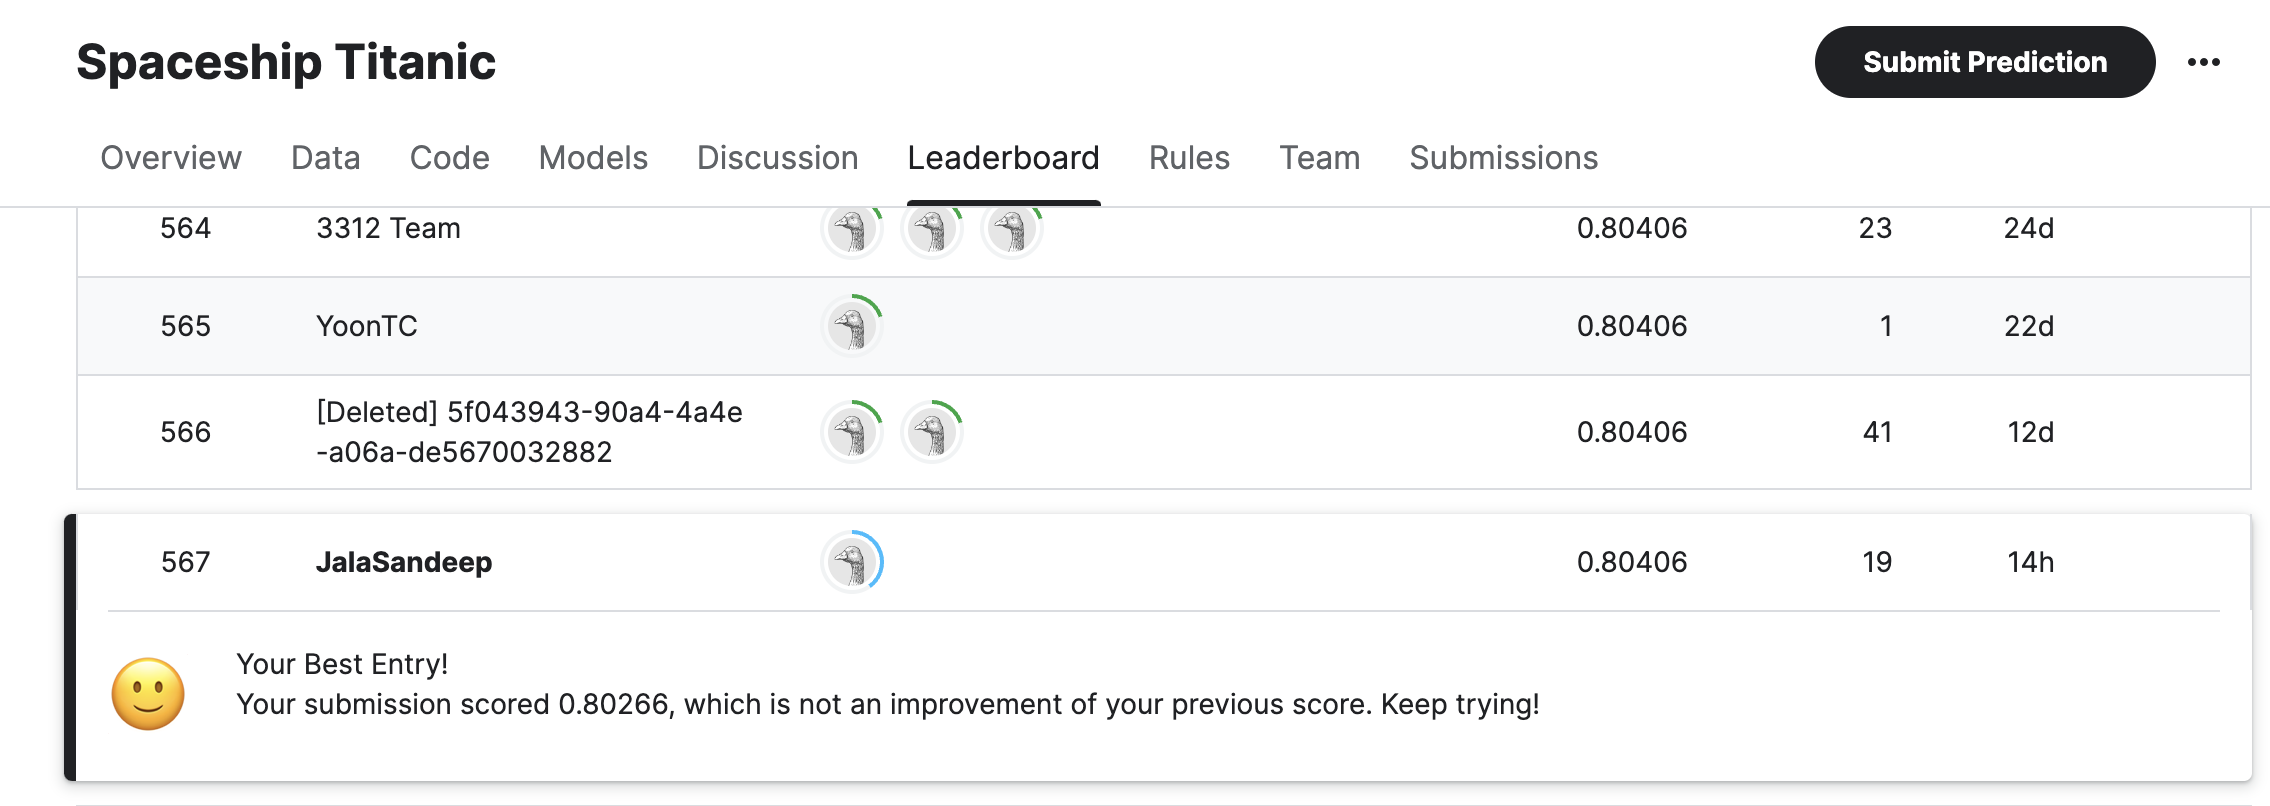

In [ ]:
from IPython.display import Image, display
display(Image('/Users/sandeepjala/Documents/SI618/SI_618_WN_24_Files/homework/Screenshot 2024-04-11 at 5.24.09 PM.png'))

# References


I used this kaggle file to understand the data.
https://www.kaggle.com/code/vicsonsam/sst-eda-17-models-dl-top-7  <br>
I used this file for the XGBoost parameters https://www.kaggle.com/code/viktortaran/space-titanic <br>
The use of GPT was for model parameter grid, I have used Quillbot to check for any grammar mistakes in the markdowns.